In [1]:
using Plots, StaticArrays, Parameters
default(colorbar=false)

rotate(u, v, w) = let c = cosd, s = sind
    SMatrix{3, 3}(
        c(u)*c(v), c(u)*s(v)*s(w)-s(u)*c(w), c(u)*s(v)*c(w)+s(u)*s(w),
        s(u)*c(v), s(u)*s(v)*s(w)+c(u)*c(w), c(u)*s(v)*s(w)-c(u)*s(w),
            -s(v),      c(v)*s(w),                c(v)*c(w))'
end

"""Assume `surffunc(u, v)` returns `(x, y, z, h)`."""
function plot_surface(u, v, surffunc, param; R = rotate(0, 0, 0), kwargs...)
    xyzh = surffunc.(u', v, Ref(param))
    xyz = (((x, y, z, h),) -> R * SVector(x, y, z)).(xyzh)
    x, y, z = ((a -> a[i]).(xyz) for i in 1:3)
    h = (((x, y, z, h),) -> h).(xyzh)
    surface(x, y, z; fill_z = h, kwargs...)
end

plot_surface

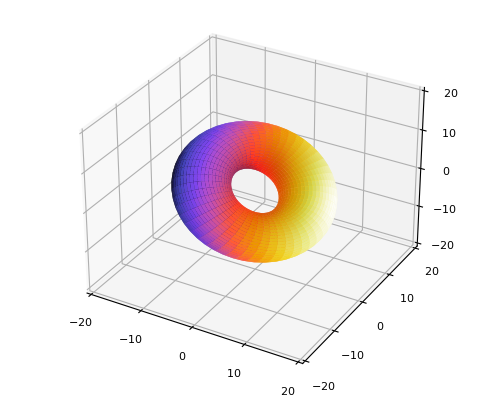

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = py_set_spine_color(spines::PyCall.PyObject, color::NTuple{4, FixedPointNumbers.N0f8}) at pyplot.jl:884
└ @ Plots D:\.julia\packages\Plots\HcxwM\src\backends\pyplot.jl:884


In [2]:
pyplot(fmt=:png)

function torusfunc(u, v, param)
    @unpack a, b, d = param
    x = (b + a * cos(u)) * cos(v)
    y = (b + a * cos(u)) * sin(v)
    z =      a * sin(u)
    h = d' * SVector(x, y, z)
    x, y, z, h
end

torusparam = (a = 5, b = 10, d = SVector(1, 0, 1))
n = 50
u_torus = v_torus = range(0, 2π; length = n + 1)
plot_surface(u_torus, v_torus, torusfunc, torusparam; size=(500, 400), 
    lims=(-20, 20), color=:CMRmap, R=rotate(30, 30, 30))

 16.992817 seconds (1.35 M allocations: 96.469 MiB, 0.19% gc time, 0.70% compilation time)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0016\torus.gif
└ @ Plots D:\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0016\\torus.gif")
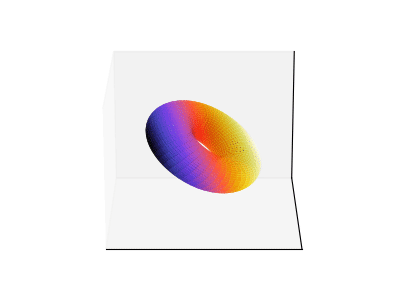

In [3]:
pyplot(fmt=:png)
@time anim = @animate for t in range(0, 360; length=41)[1:end-1]
    plot_surface(u_torus, v_torus, torusfunc, torusparam; size=(400, 300),
        lims=(-20, 20), color=:CMRmap, R=rotate(30, 30, 30),
        camera=(t, 20), ticks=false)
end
PyPlot.clf()
gif(anim, "torus.gif")

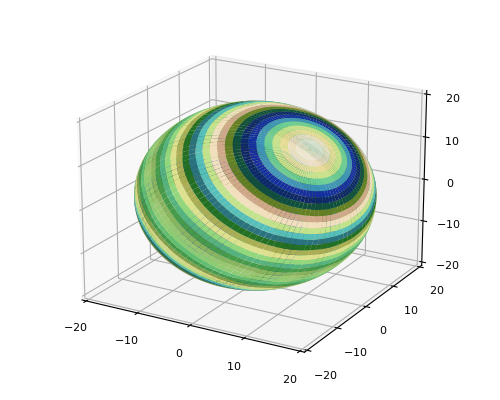

In [4]:
pyplot(fmt=:png)

function spherefunc(u, v, param)
    @unpack r, d, f = param
    x = r * cos(u) * cos(v)
    y = r * cos(u) * sin(v)
    z = r * sin(u)
    h = f(d' * SVector(x, y, z))
    x, y, z, h
end

sphereparam = (
    r = 20,
    d = SVector(0, 0, 1),
    f = h -> (1 + abs(h - 1)) * sin(h)
)
n = 50
u_sphere = range(-π/2, π/2; length = n + 1)
v_sphere = range(0, 2π; length = 2n + 1)
plot_surface(u_sphere, v_sphere, spherefunc, sphereparam; size=(500, 400), 
    lims=(-20, 20), color=:gist_earth, R=rotate(30, 30, 30),
    camera=(30, 20))

 29.463989 seconds (404.49 k allocations: 53.803 MiB, 0.05% gc time, 0.06% compilation time)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0016\sphere.gif
└ @ Plots D:\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0016\\sphere.gif")
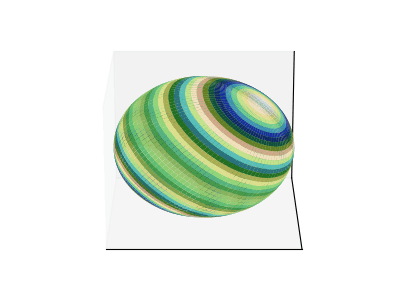

In [5]:
pyplot(fmt=:png)
@time anim = @animate for t in range(0, 360; length=41)[1:end-1]
    plot_surface(u_sphere, v_sphere, spherefunc, sphereparam; size=(400, 300),
        lims=(-20, 20), color=:gist_earth, R=rotate(30, 30, 30),
        camera=(t, 20), ticks=false)
end
PyPlot.clf()
gif(anim, "sphere.gif")

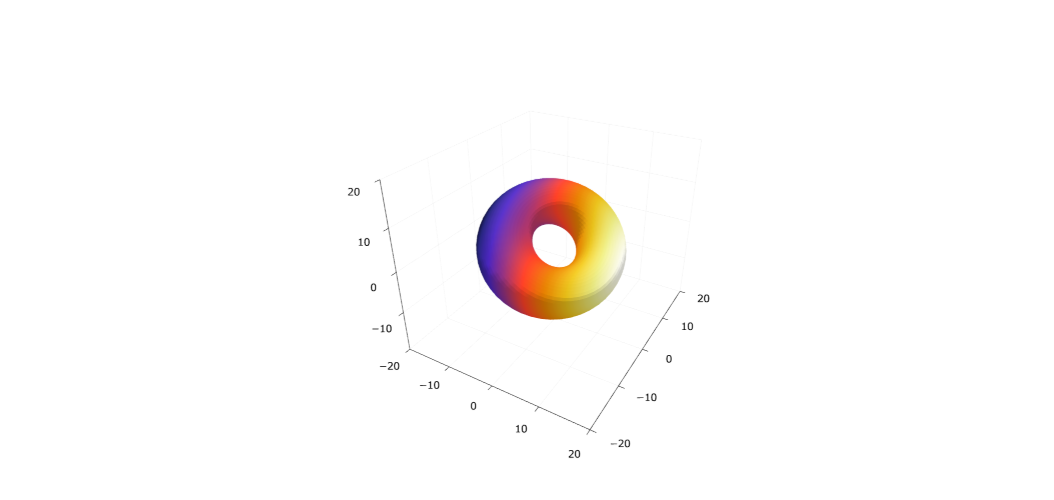

In [6]:
plotly(fmt=:auto)
plot_surface(u_torus, v_torus, torusfunc, torusparam; size=(500, 500), 
    lims=(-20, 20), color=:CMRmap, R=rotate(30, 30, 30))

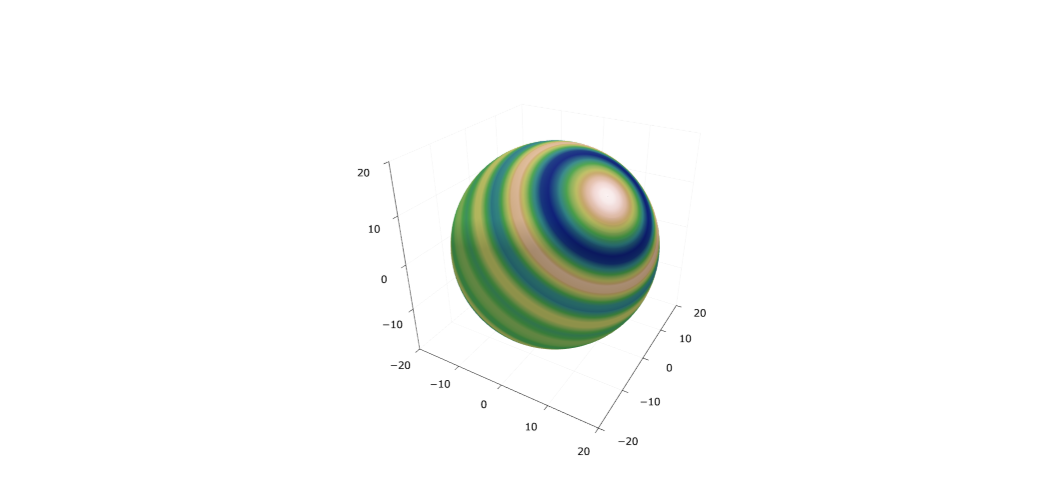

In [7]:
plotly(fmt=:auto)
plot_surface(u_sphere, v_sphere, spherefunc, sphereparam; size=(500, 500), 
    lims=(-20, 20), color=:gist_earth, R=rotate(30, 30, 30))

In [2]:
using Pkg
println("Julia v", VERSION)
Pkg.status("IJulia")
Pkg.status("PyCall"; mode = PKGMODE_MANIFEST)
Pkg.status("Plots")
Pkg.status("PyPlot")
Pkg.status("Plotly")
Pkg.status("StaticArrays")
Pkg.status("Parameters")

Julia v1.6.2
      Status `D:\.julia\environments\v1.6\Project.toml`
  [7073ff75] IJulia v1.23.2
      Status `D:\.julia\environments\v1.6\Manifest.toml`
  [438e738f] PyCall v1.92.3
      Status `D:\.julia\environments\v1.6\Project.toml`
  [91a5bcdd] Plots v1.20.1
      Status `D:\.julia\environments\v1.6\Project.toml`
  [d330b81b] PyPlot v2.9.0
      Status `D:\.julia\environments\v1.6\Project.toml`
  [58dd65bb] Plotly v0.4.0
      Status `D:\.julia\environments\v1.6\Project.toml`
  [90137ffa] StaticArrays v1.2.12
      Status `D:\.julia\environments\v1.6\Project.toml`
  [d96e819e] Parameters v0.12.2
